# Assignment 4
### Name: Rejona Susan. J
### Reg no: 21BEC0052

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("/content/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Univariate Analysis

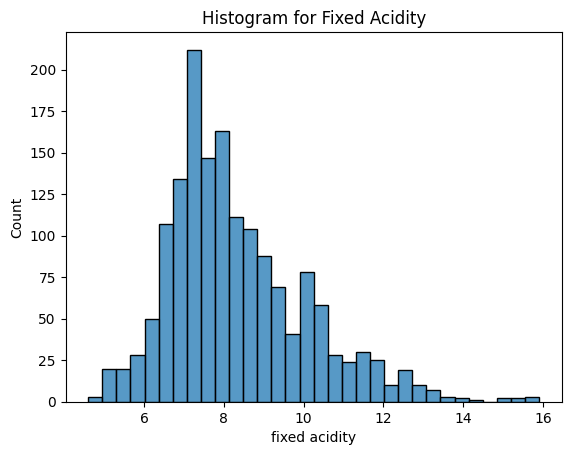

In [3]:
sns.histplot(df['fixed acidity'])
plt.title('Histogram for Fixed Acidity')
plt.show()

<ipython-input-5-8dd3f5f3b6d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['volatile acidity'])


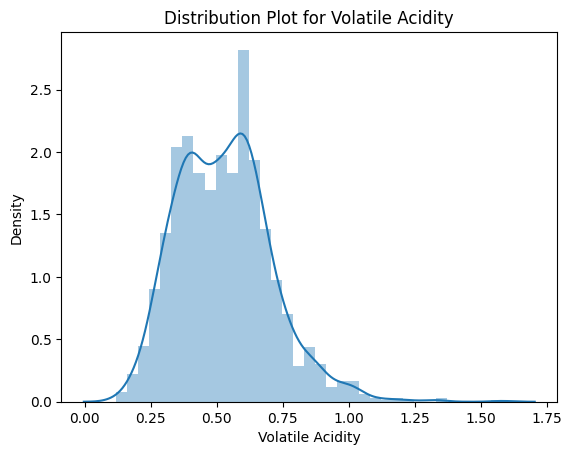

In [5]:
sns.distplot(df['volatile acidity'])
plt.title('Distribution Plot for Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.show()

## Bivariate Analysis

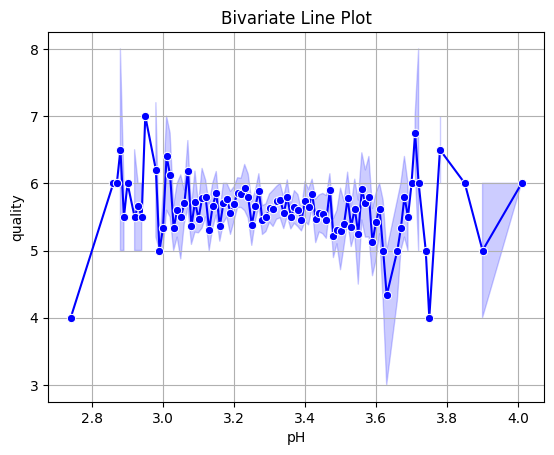

In [18]:
x= 'pH'
y= 'quality'
sns.lineplot(data=df, x=x, y=y, marker='o', color='blue')
plt.title('Bivariate Line Plot')
plt.xlabel(x)
plt.ylabel(y)
plt.grid(True)
plt.show()

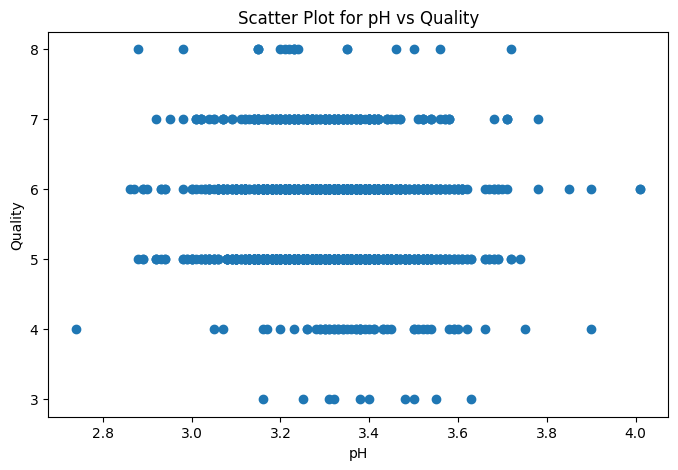

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.title('Scatter Plot for pH vs Quality')
plt.xlabel('pH')
plt.ylabel('Quality')
plt.show()

## Multivariate Analysis

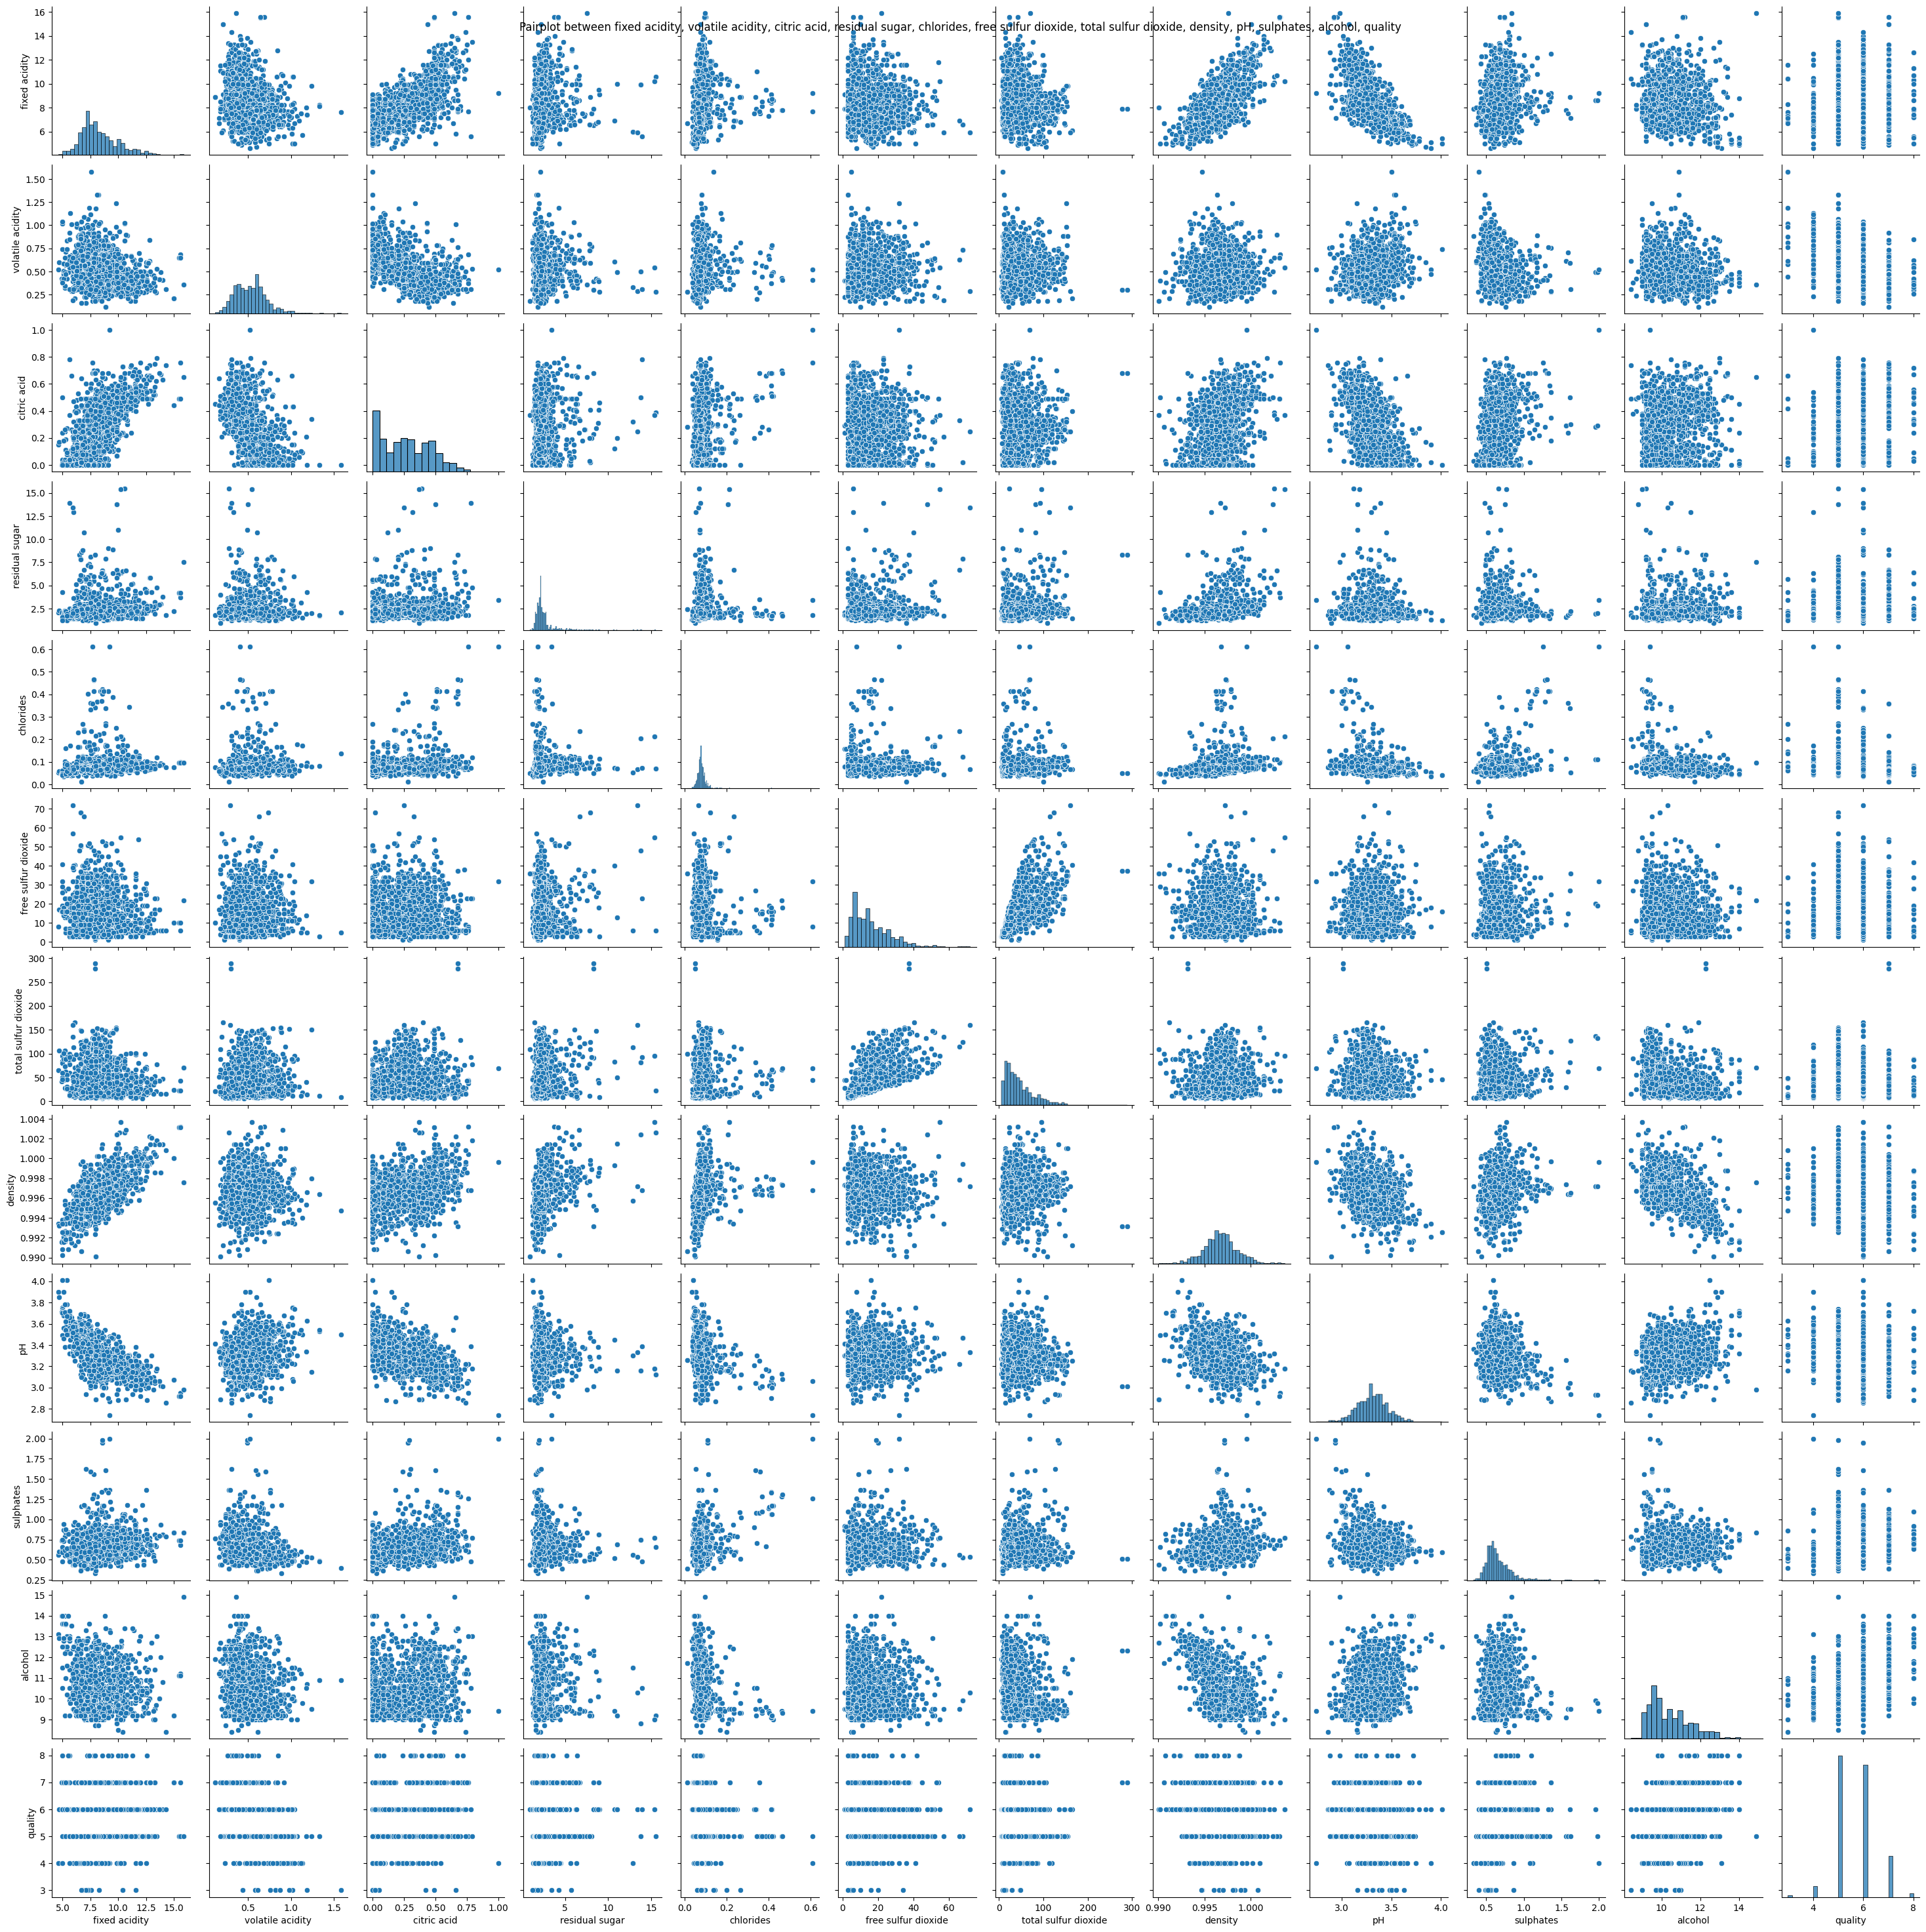

In [19]:
num = df.select_dtypes(include=['number']).columns.tolist()
g= sns.pairplot(df, vars=num)
g.fig.suptitle(f'Pairplot between {", ".join(num)}',ha="center")

plt.show()

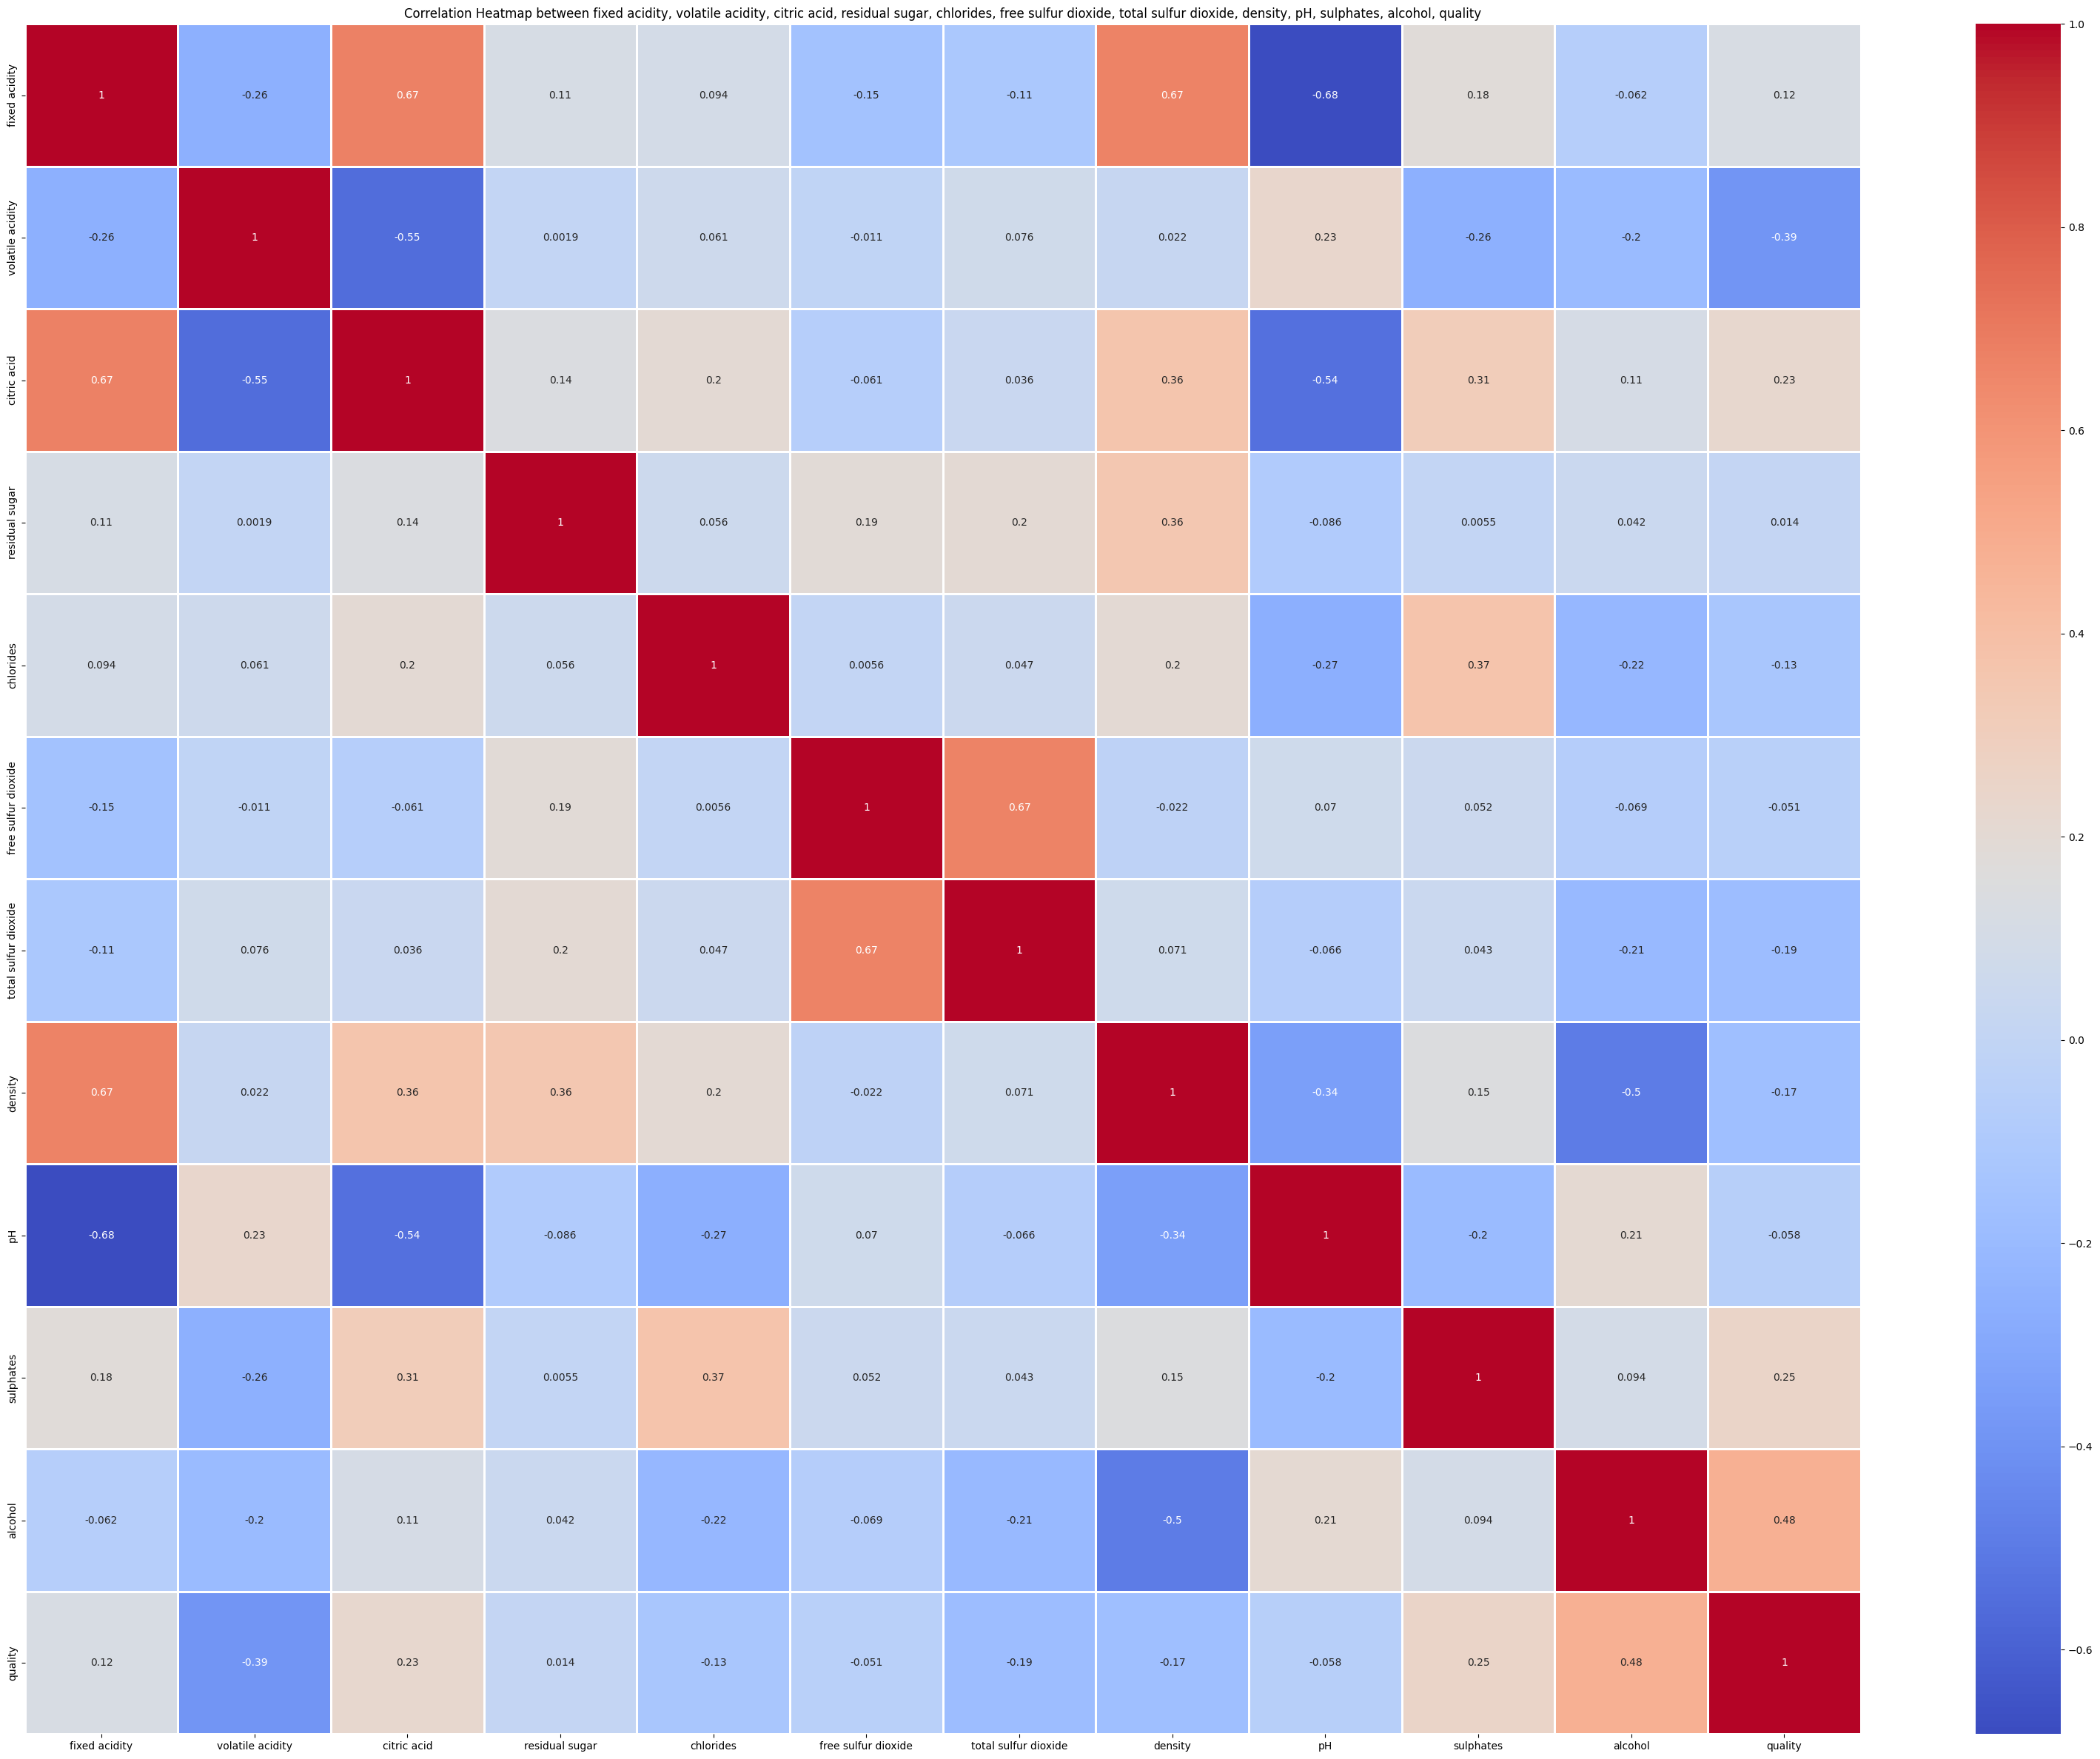

In [20]:
l=df.columns.tolist()
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title(f'Correlation Heatmap between {", ".join(l)}')
plt.show()

## Data Preprocessing

In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [22]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

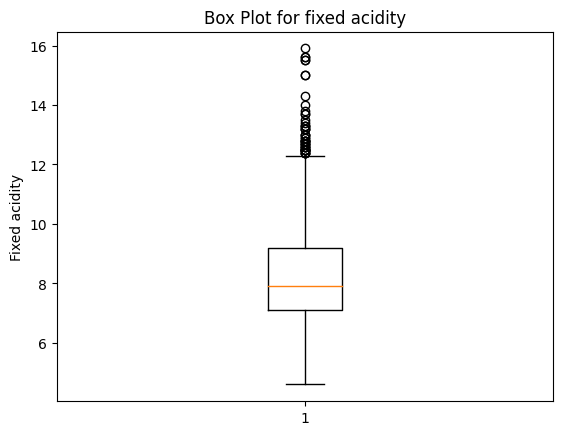

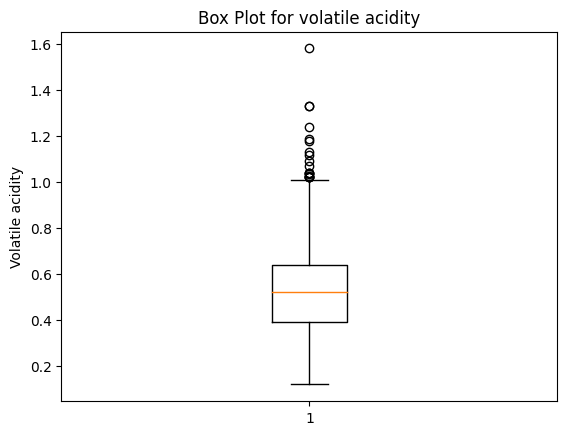

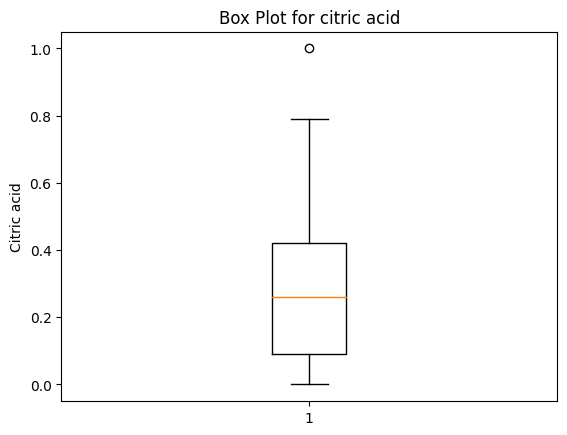

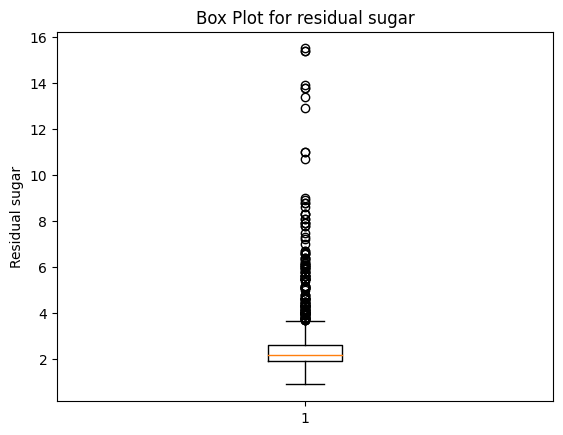

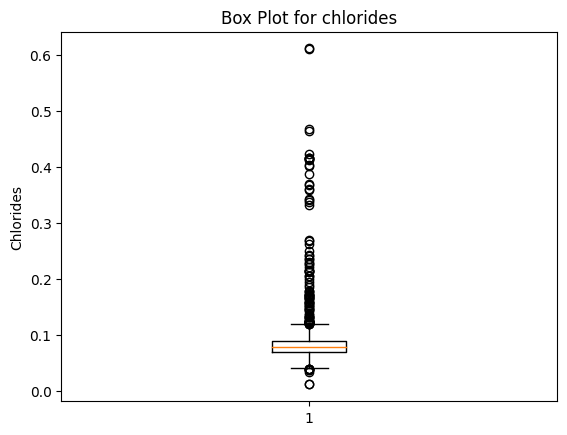

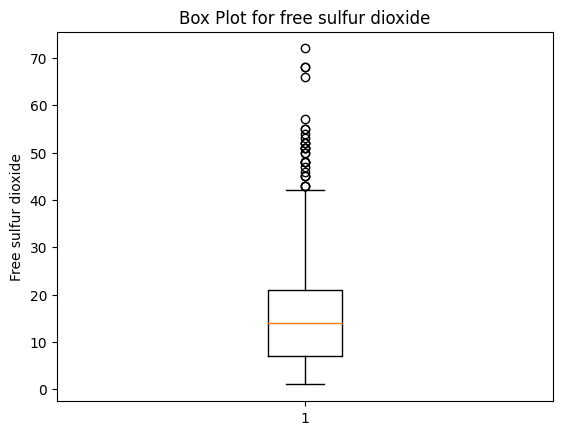

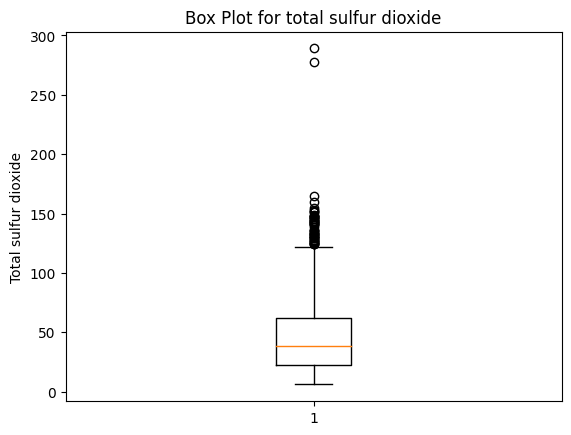

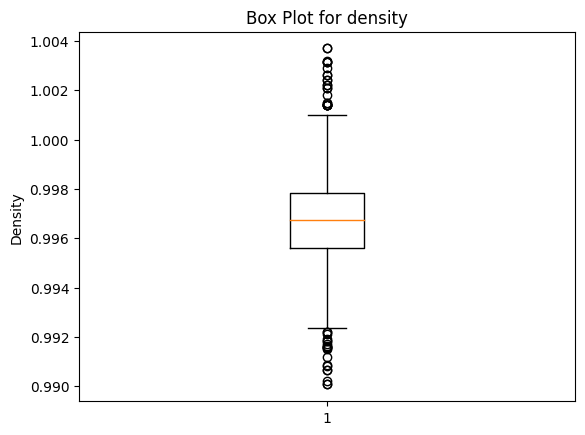

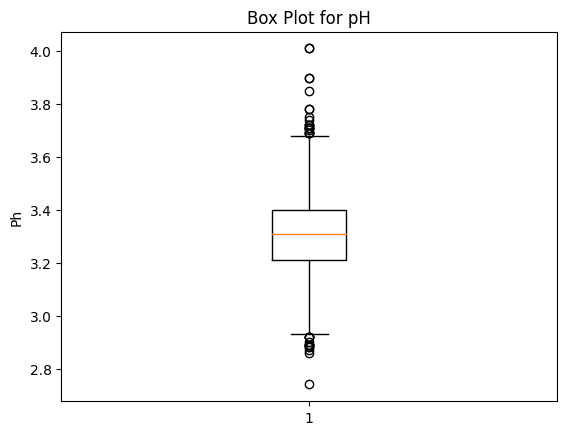

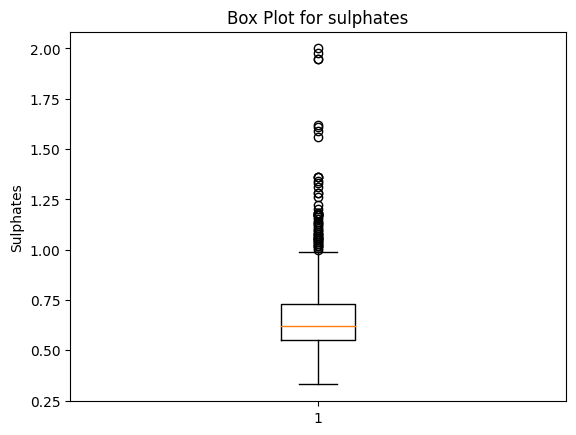

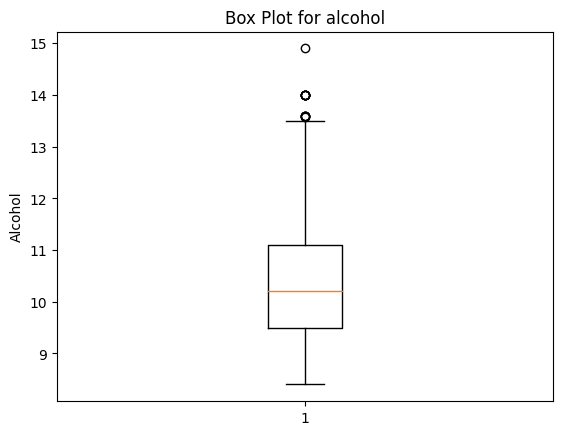

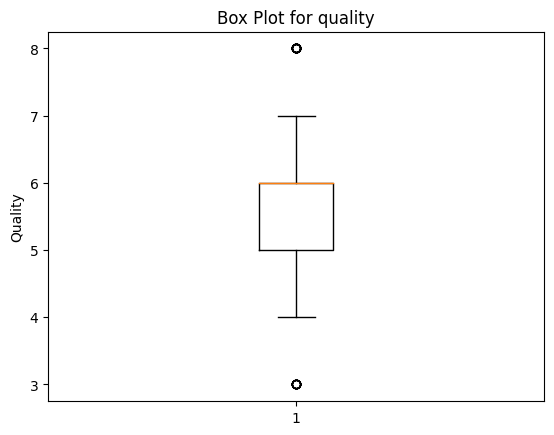

In [23]:
# Finding the outliers and Replacing them. Replacement with Median
for i in df.columns.tolist():
    plt.boxplot(df[i])
    plt.title('Box Plot for {}'.format(i))
    plt.ylabel(i.capitalize())
    plt.show()

In [24]:
# Finding the Number of Outliers.
for i in df.columns.tolist():
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    s = 0
    for j in df[i]:
        if j < lb or j > ub:
            s += 1
    print('Number of Outliers in {}: {}'.format(i, s))

Number of Outliers in fixed acidity: 49
Number of Outliers in volatile acidity: 19
Number of Outliers in citric acid: 1
Number of Outliers in residual sugar: 155
Number of Outliers in chlorides: 112
Number of Outliers in free sulfur dioxide: 30
Number of Outliers in total sulfur dioxide: 55
Number of Outliers in density: 45
Number of Outliers in pH: 35
Number of Outliers in sulphates: 59
Number of Outliers in alcohol: 13
Number of Outliers in quality: 28


In [25]:
# Outlier Replacement by Median.
def replace_outliers_with_median(data, column, lower_bound, upper_bound):
    median = data[column].median()
    data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return data

for i in df.columns.tolist():
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    df = replace_outliers_with_median(df, i, lower_bound, upper_bound)

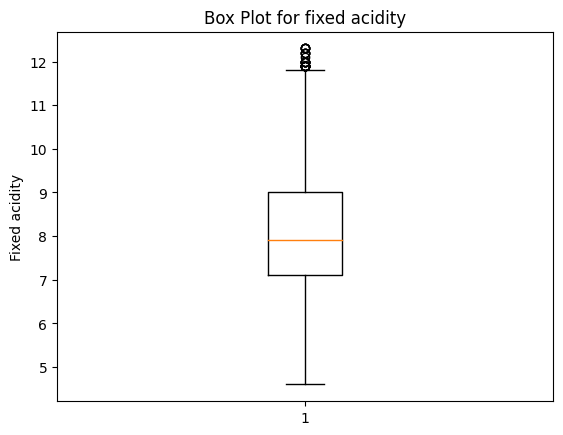

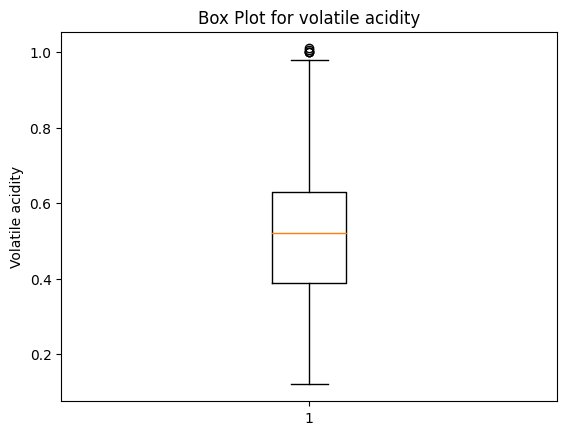

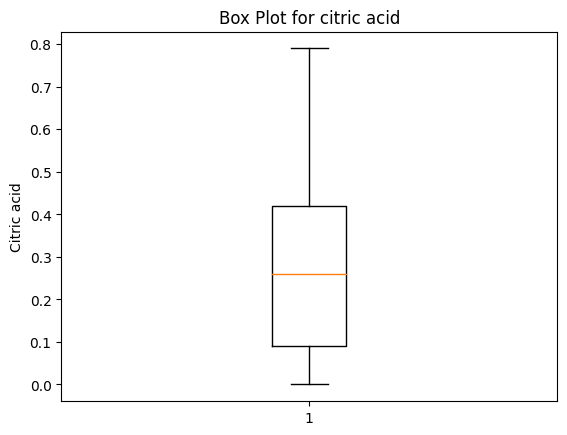

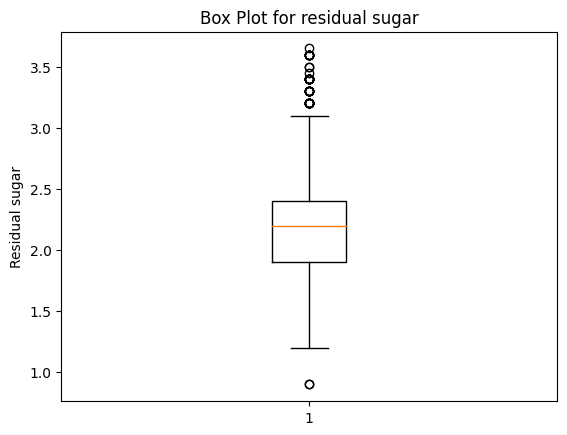

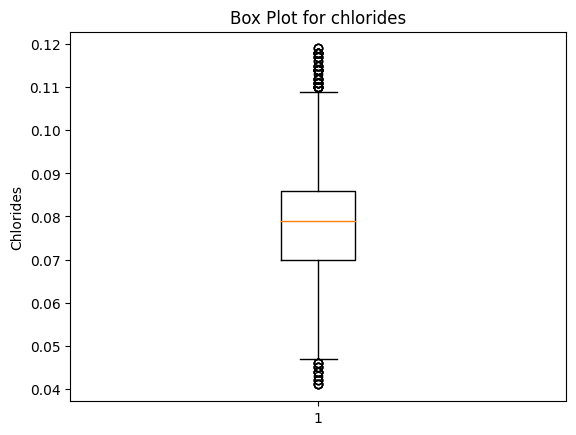

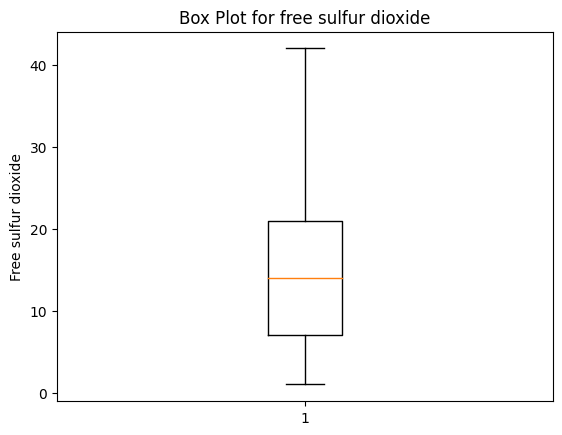

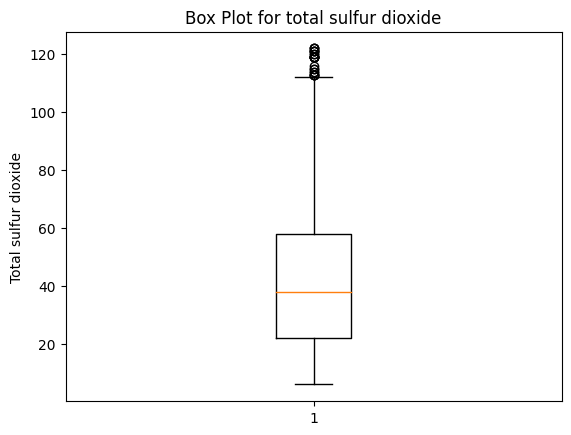

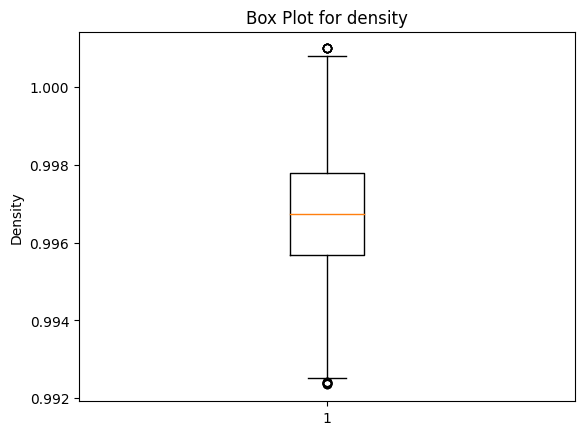

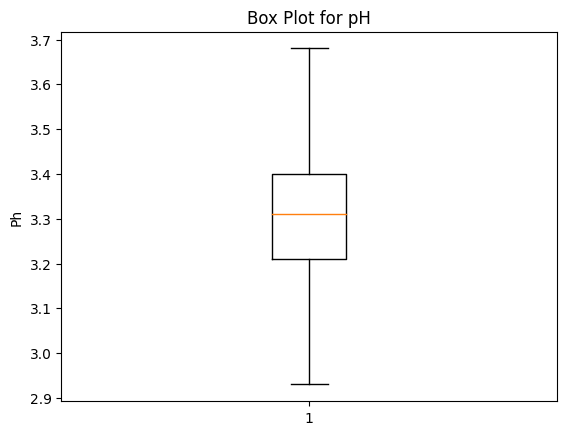

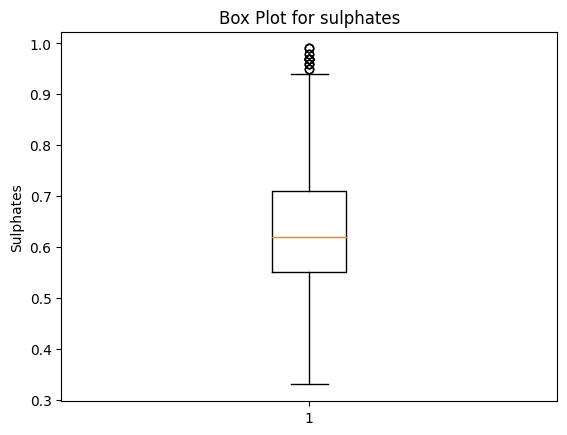

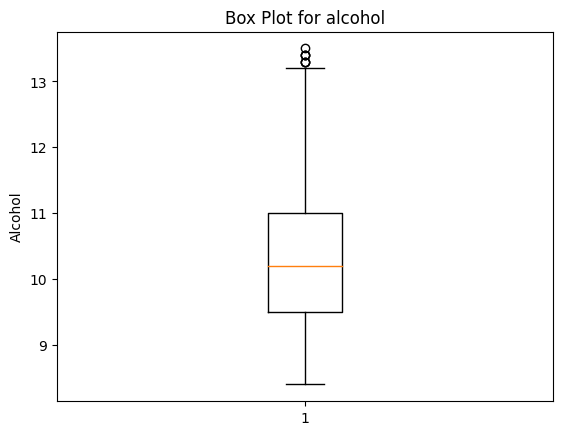

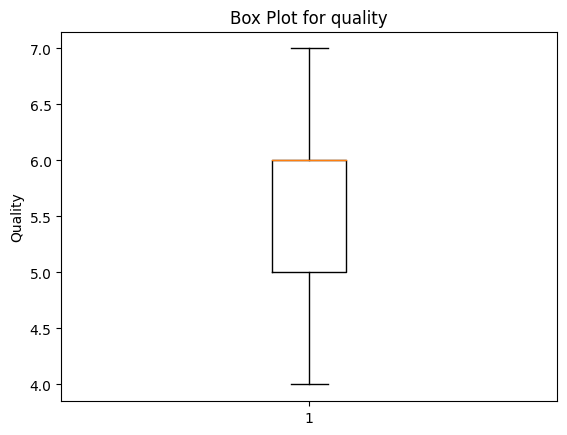

In [26]:
# Rechecking for any outliers
for i in df.columns.tolist():
    plt.boxplot(df[i])
    plt.title('Box Plot for {}'.format(i))
    plt.ylabel(i.capitalize())
    plt.show()

In [27]:
# Rechecking for the number of outliers.
for i in df.columns.tolist():
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    s = 0
    for j in df[i]:
        if j < lb or j > ub:
            s += 1
    print('Number of Outliers in {}: {}'.format(i, s))

Number of Outliers in fixed acidity: 29
Number of Outliers in volatile acidity: 5
Number of Outliers in citric acid: 0
Number of Outliers in residual sugar: 55
Number of Outliers in chlorides: 76
Number of Outliers in free sulfur dioxide: 0
Number of Outliers in total sulfur dioxide: 25
Number of Outliers in density: 13
Number of Outliers in pH: 0
Number of Outliers in sulphates: 16
Number of Outliers in alcohol: 7
Number of Outliers in quality: 0


In [28]:
# Check the Correlation of Indpendent Variables with the target
df.corr().quality.sort_values(ascending= False)

quality                 1.000000
alcohol                 0.457148
sulphates               0.379741
citric acid             0.221375
fixed acidity           0.120012
residual sugar          0.032971
free sulfur dioxide    -0.056747
pH                     -0.057587
density                -0.150961
chlorides              -0.154172
total sulfur dioxide   -0.189597
volatile acidity       -0.349090
Name: quality, dtype: float64

In [29]:
# Independent variable
y = df['quality']
y.head()

0    5.0
1    5.0
2    5.0
3    6.0
4    5.0
Name: quality, dtype: float64

In [30]:
# Dependent variables
x=df.drop(columns =['quality'],axis =1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [31]:
# Scaling
scale =StandardScaler()
x_scaled =pd.DataFrame(scale.fit_transform(x),columns = x.columns)
x_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.506257,1.084072,-1.395226,-0.660402,-0.193503,-0.455657,-0.329932,0.648369,1.448448,-0.638601,-0.976125
1,-0.237876,2.171450,-1.395226,0.980050,1.341692,1.076386,0.903736,0.039563,-0.783248,0.372245,-0.582843
2,-0.237876,1.446531,-1.188918,0.276999,0.923002,-0.017931,0.417746,0.161324,-0.351307,0.119534,-0.582843
3,2.043366,-1.453143,1.493090,-0.660402,-0.263285,0.200933,0.642049,0.770130,-1.071209,-0.470127,-0.582843
4,-0.506257,1.084072,-1.395226,-0.660402,-0.193503,-0.455657,-0.329932,0.648369,1.448448,-0.638601,-0.976125


In [32]:
# Splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=10)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


## Model

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

In [35]:
y_predict = lr.predict(x_test)
y_predict

array([5.66715281, 5.18025912, 5.5202255 , 5.5760921 , 5.36917152,
       6.16779828, 6.06870982, 5.97734285, 5.41333203, 5.26264476,
       6.24442811, 5.29269792, 5.1291567 , 5.09828421, 5.25131786,
       5.25039207, 5.42274088, 5.68580141, 5.42403118, 4.79447291,
       5.11973344, 5.97099587, 5.58125489, 5.26106933, 5.03226805,
       5.72512074, 5.84899037, 5.48148121, 5.83814766, 5.25228814,
       5.21282705, 5.46851949, 5.96049087, 6.25361569, 6.27360484,
       5.14759684, 6.68594068, 5.43481101, 5.83844258, 5.13833169,
       5.87239899, 5.93923524, 5.29437916, 5.68906358, 5.21723189,
       6.06870982, 5.48838044, 5.69806135, 6.41423047, 5.79503828,
       5.85189786, 6.61925187, 6.43517864, 6.25680187, 5.43195415,
       6.3978176 , 5.6424548 , 5.37372155, 5.36546274, 5.32644405,
       5.7404743 , 5.31596011, 6.39036392, 5.78746336, 5.46158356,
       5.26900977, 5.66727281, 5.59848547, 5.34348763, 5.87914685,
       5.74440688, 5.06774551, 5.48599558, 5.42185398, 5.50087

In [36]:
y_predict1 =lr.predict(x_train)
y_predict1

array([5.40033221, 5.88179393, 5.49599911, ..., 6.02385918, 6.12446298,
       5.26301446])

In [37]:
profit =pd.DataFrame({'Actual Quality':y_test,'Predicted Quality':y_predict})
profit

,Actual Quality,Predicted Quality
1518,5.0,5.667153
1246,5.0,5.180259
544,6.0,5.520226
1343,6.0,5.576092
428,5.0,5.369172
...,...,...
174,5.0,5.296545
387,6.0,5.207858
1560,5.0,5.350263
846,5.0,5.346641


## Evaluate

In [38]:
# R2 Score.
print(metrics.r2_score(y_test,y_predict))
print(metrics.r2_score(y_train,y_predict1))

0.35893216743723444
0.3292032042972428


In [40]:
# Mean Square Error.
print(metrics.mean_squared_error(y_test,y_predict))

0.34920389434877325


In [39]:
# Root Mean Square Error.
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

0.59093476319199


## Test


In [43]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [41]:
lr.predict([[11.2,0.7,0.00,2.3,0.075,17.5,34,0.9970,3.51,0.56,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.88049527])

In [42]:
lr.predict([[11.2,0.7,0.40,1.9,0.075,16.5,23,0.9980,3.21,0.76,5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.59271539])